In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

os.environ['DATA_DIR'] = '/home/arco/Downloads/Master AI/CEConvDL2'
os.environ['WANDB_DIR'] = '/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/site-packages/'
os.environ['OUT_DIR'] = '/home/arco/Downloads/Master AI/CEConv/output'



In [ ]:
!python -m experiments.color_mnist.colormnist_longtailed

for i in range(1, 11):
    !python -m experiments.color_mnist.train_longtailed --rotations 1 --planes 20 --grayscale --seed {i}
    !python -m experiments.color_mnist.train_longtailed --rotations 3 --planes 17 --separable --seed {i}

In [2]:
import os

os.environ['DATA_DIR'] = '/home/arco/Downloads/Master AI/CEConvDL2'
os.environ['WANDB_DIR'] = '/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/site-packages/'
os.environ['OUT_DIR'] = '/home/arco/Downloads/Master AI/CEConv/output'

!python -m experiments.color_mnist.colormnist_longtailed

for i in range(1, 11):
    !python -m experiments.color_mnist.train_longtailed --rotations 1 --planes 20 --seed {i}

Generated ColorMNIST - longtailed dataset at /home/arco/Downloads/Master AI/CEConvDL2/colormnist_longtailed
Global seed set to 1
train: (tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), tensor([ 26, 105, 103,  77,   1,  44,   6,  17,  38,   1,   2,  50,  67,  88,
         65,   1,   1,  58,   2,   2,  90, 127,  22,   1,  63,  15,  33,  84,
         12,  15]))
test: (tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), tensor([250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
        250, 250]))
Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [2, 30]                   --
├─Conv2d: 1-1                            [2, 20, 26, 26]           560
├─BatchNorm2

model performances:
	Z2CNN: 0.668+/-0.006
	CECNN: 0.852+/-0.012


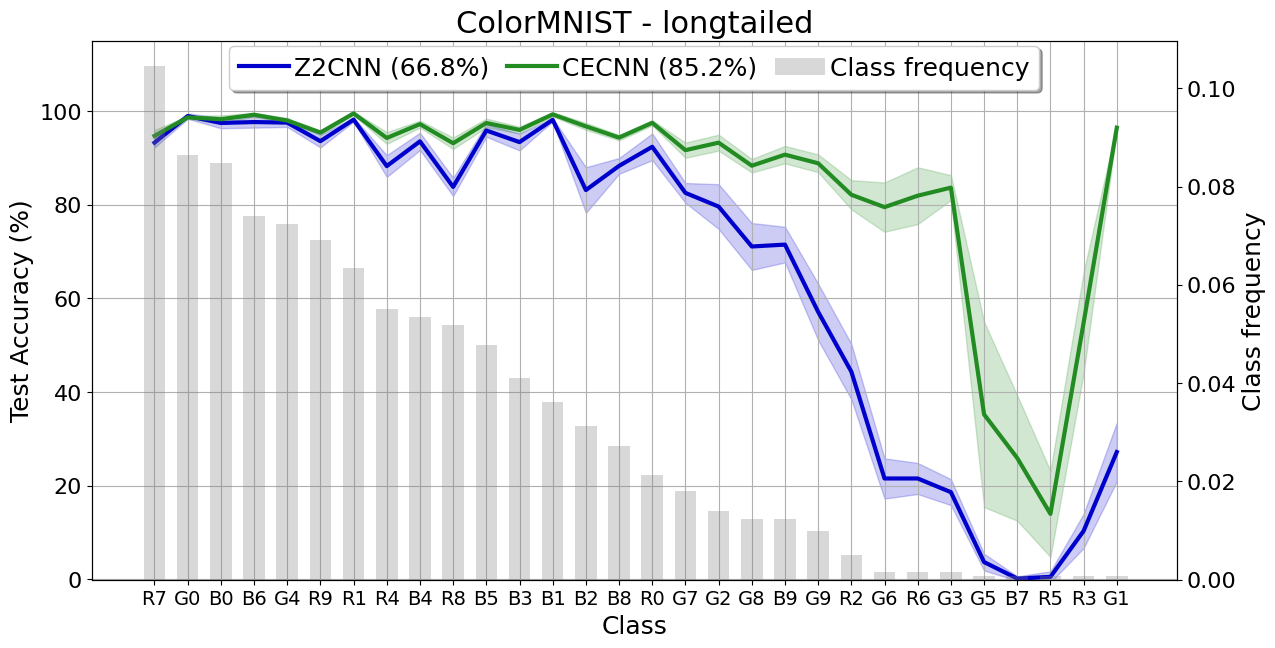

In [30]:
from utils import plot_figure_2
plot_figure_2("/home/arco/Downloads/Master AI/CEConvDL2")

model performances:
		 ResNet-18: 0.147
		 ResNet-18 + jitter: 0.719
		 CE-ResNet-18 [Novel]: 0.342
		 CE-ResNet-18 + jitter [Novel]: 0.756


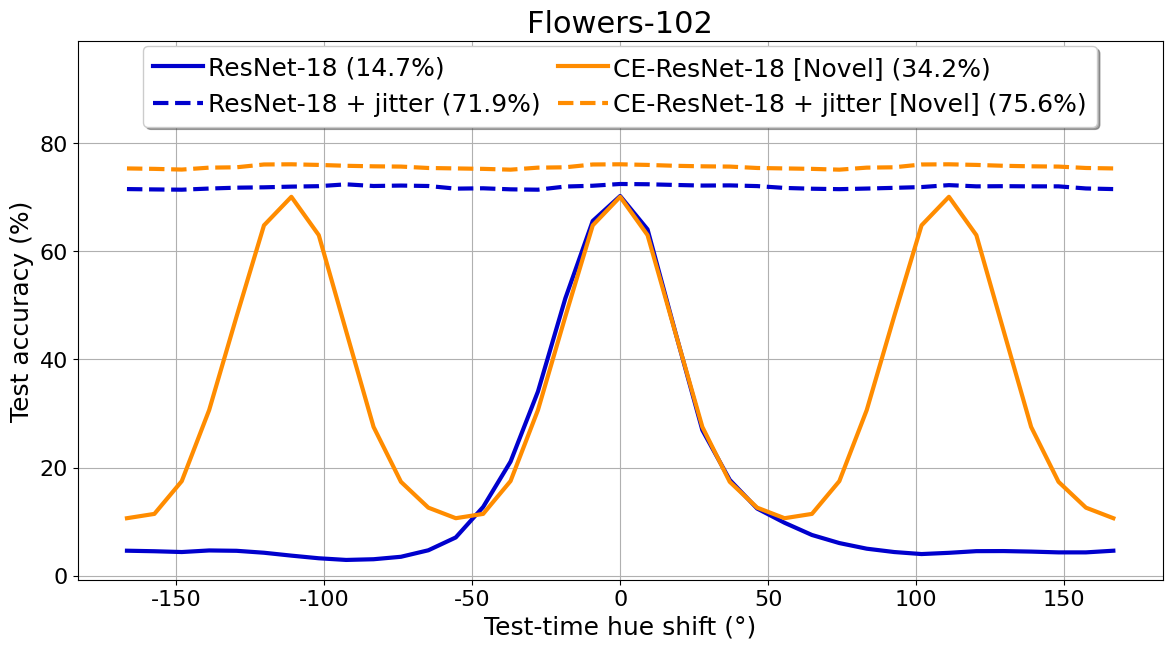

In [29]:
from utils import plot_figure_9
plot_figure_9("/home/arco/Downloads/Master AI/CEConvDL2")

111


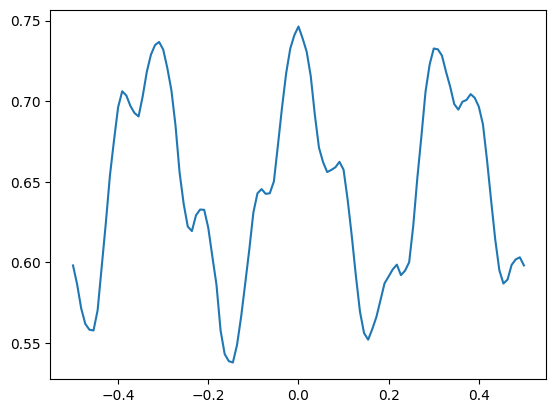

In [4]:
import matplotlib.pyplot as plt
hues = [-0.5, -0.4909090909090909, -0.4818181818181818, -0.4727272727272727, -0.4636363636363636, -0.45454545454545453, -0.44545454545454544, -0.4363636363636364, -0.42727272727272725, -0.4181818181818182, -0.40909090909090906, -0.4, -0.39090909090909093, -0.38181818181818183, -0.37272727272727274, -0.36363636363636365, -0.35454545454545455, -0.34545454545454546, -0.33636363636363636, -0.32727272727272727, -0.3181818181818182, -0.3090909090909091, -0.30000000000000004, -0.2909090909090909, -0.28181818181818186, -0.2727272727272727, -0.26363636363636367, -0.2545454545454545, -0.24545454545454548, -0.2363636363636364, -0.2272727272727273, -0.2181818181818182, -0.2090909090909091, -0.2, -0.19090909090909092, -0.18181818181818182, -0.17272727272727273, -0.16363636363636364, -0.15454545454545454, -0.14545454545454545, -0.13636363636363635, -0.12727272727272732, -0.11818181818181822, -0.10909090909090913, -0.10000000000000003, -0.09090909090909094, -0.08181818181818185, -0.07272727272727275, -0.06363636363636366, -0.054545454545454564, -0.04545454545454547, -0.036363636363636376, -0.027272727272727282, -0.018181818181818188, -0.009090909090909094, 0.0, 0.009090909090909038, 0.018181818181818188, 0.027272727272727226, 0.036363636363636376, 0.045454545454545414, 0.054545454545454564, 0.0636363636363636, 0.07272727272727275, 0.08181818181818179, 0.09090909090909083, 0.09999999999999998, 0.10909090909090902, 0.11818181818181817, 0.1272727272727272, 0.13636363636363635, 0.1454545454545454, 0.15454545454545454, 0.16363636363636358, 0.17272727272727273, 0.18181818181818177, 0.19090909090909092, 0.19999999999999996, 0.2090909090909091, 0.21818181818181814, 0.2272727272727273, 0.23636363636363633, 0.24545454545454537, 0.2545454545454545, 0.26363636363636356, 0.2727272727272727, 0.28181818181818175, 0.2909090909090909, 0.29999999999999993, 0.3090909090909091, 0.3181818181818181, 0.32727272727272727, 0.3363636363636363, 0.34545454545454546, 0.3545454545454545, 0.36363636363636365, 0.3727272727272727, 0.3818181818181817, 0.3909090909090909, 0.3999999999999999, 0.40909090909090906, 0.4181818181818181, 0.42727272727272725, 0.4363636363636363, 0.44545454545454544, 0.4545454545454545, 0.4636363636363636, 0.47272727272727266, 0.4818181818181818, 0.49090909090909085, 0.5] 


sat = [0.5981460213661194, 0.5864368081092834, 0.5714750289916992, 0.5618799924850464, 0.5583021640777588, 0.5578143000602722, 0.570336639881134, 0.5973328948020935, 0.624329149723053, 0.6537648439407349, 0.6757196187973022, 0.6962107419967651, 0.706131100654602, 0.7035290002822876, 0.6970239281654358, 0.6926329731941223, 0.6905187964439392, 0.703041136264801, 0.7181655764579773, 0.728736400604248, 0.7347536087036133, 0.7367051839828491, 0.7319889664649963, 0.7206049561500549, 0.7067815661430359, 0.6849894523620605, 0.6557163596153259, 0.636201024055481, 0.6222149729728699, 0.6194503307342529, 0.6292080283164978, 0.6327857971191406, 0.6326231956481934, 0.621401846408844, 0.6035127639770508, 0.5861115455627441, 0.5578143000602722, 0.5431777238845825, 0.538786768913269, 0.5379736423492432, 0.548707127571106, 0.5661082863807678, 0.5867620706558228, 0.6079037189483643, 0.6309968829154968, 0.6428687572479248, 0.6454707980155945, 0.6425434947013855, 0.6428687572479248, 0.6501870155334473, 0.6729549765586853, 0.6963734030723572, 0.7173523902893066, 0.7326394319534302, 0.7409334778785706, 0.746300220489502, 0.7389819622039795, 0.7306879162788391, 0.7154008746147156, 0.6913319230079651, 0.6711660623550415, 0.6622214913368225, 0.6560416221618652, 0.6573426723480225, 0.6589689254760742, 0.6623841524124146, 0.6575052738189697, 0.6388030648231506, 0.616523027420044, 0.5918035507202148, 0.5695235133171082, 0.5561879873275757, 0.5521222949028015, 0.5586274266242981, 0.5661082863807678, 0.5765165090560913, 0.5870873332023621, 0.5913156867027283, 0.5957066416740417, 0.5986339449882507, 0.5921288132667542, 0.5948934555053711, 0.6000975966453552, 0.6227028965950012, 0.6524637937545776, 0.678484320640564, 0.70596843957901, 0.722719132900238, 0.7326394319534302, 0.7321515679359436, 0.7282484769821167, 0.7181655764579773, 0.709058403968811, 0.698162317276001, 0.6947470903396606, 0.6996259689331055, 0.7007643580436707, 0.7043421864509583, 0.7020653486251831, 0.6965360045433044, 0.6856399178504944, 0.6633598804473877, 0.6383152008056641, 0.6142461895942688, 0.5952187180519104, 0.5869247317314148, 0.5893641114234924, 0.5984712839126587, 0.601886510848999, 0.6031875014305115, 0.5981460213661194]
print(len(sat))
plt.plot(hues, sat)
plt.show()

/home/arco/Downloads/Master AI/CEConvDL2/CEConv/utils.py:337: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


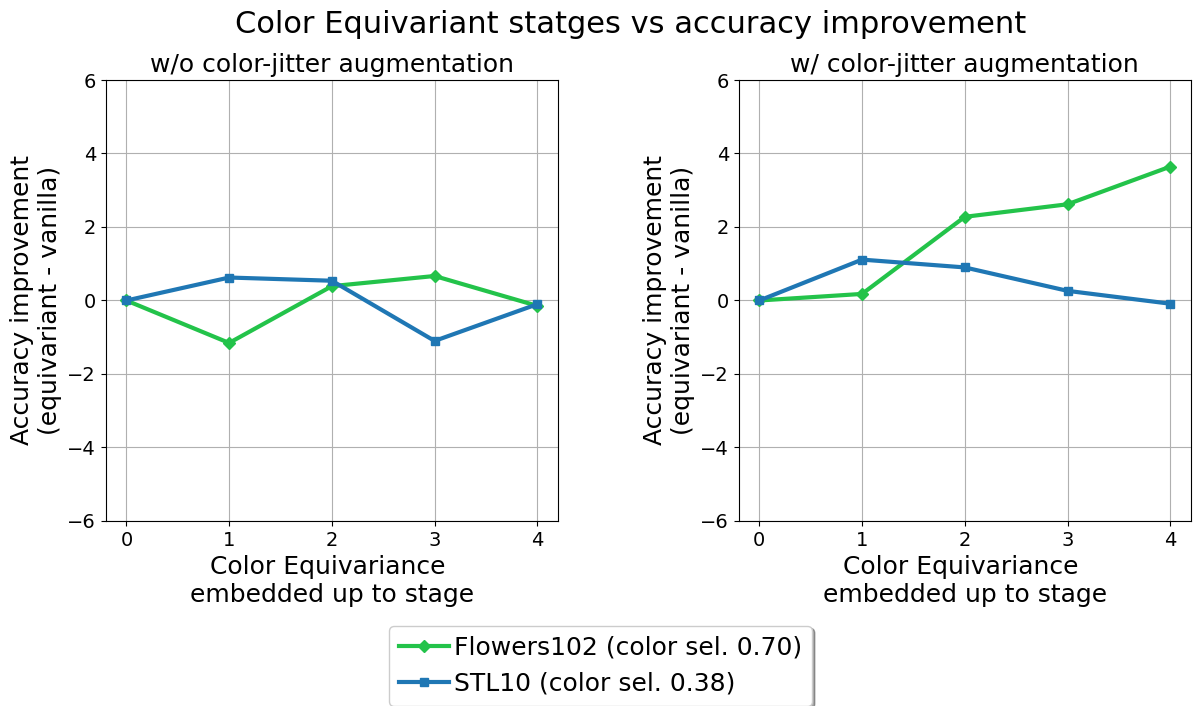

In [53]:
from utils import color_selective_datasets_plot
color_selective_datasets_plot()

Max accuracy 1 rot:  0.7025532722473145
Max accuracy 5 rot:  0.7243454456329346
Max accuracy 10 rot:  0.746300220489502


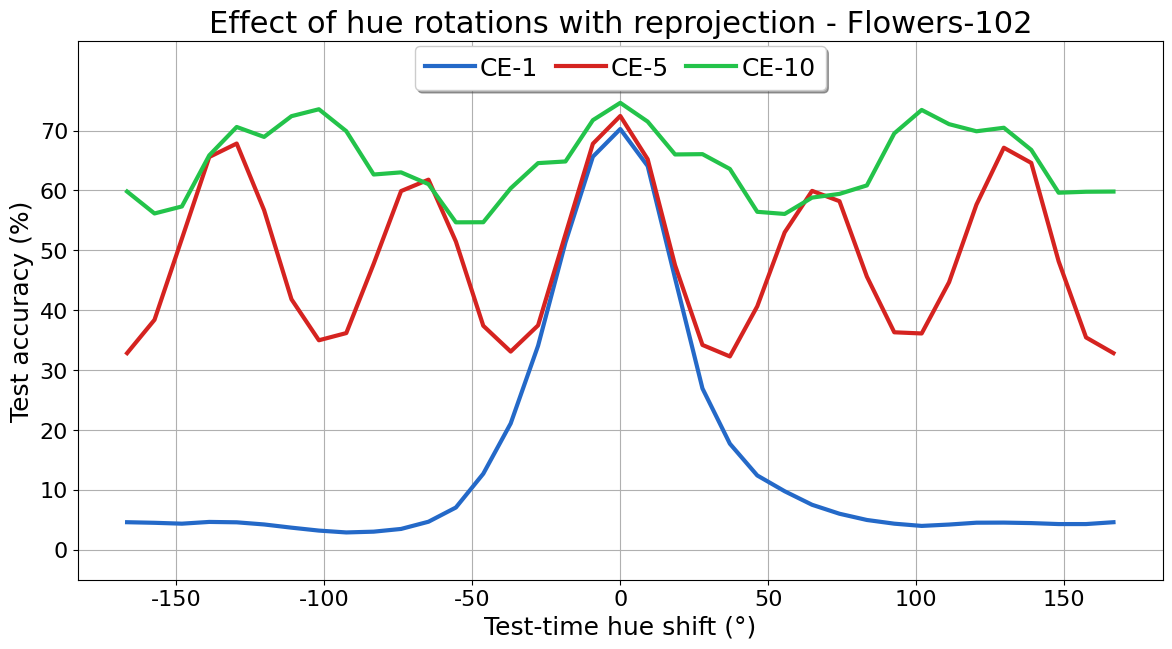

In [65]:
from utils import hue_shifts_plot
hue_shifts_plot()